In [1]:
#Importing Liberaries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#reading data
df=pd.read_csv(r'D:\Data Science\data\candy.csv')

In [3]:
#small view of data
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
#See missing value
df.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

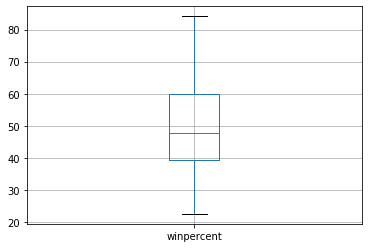

In [5]:
#See outlier
df.iloc[:,-1:].boxplot()

In [6]:
#Count plot
def count(col):
    
    sns.countplot(x=col,data=df)

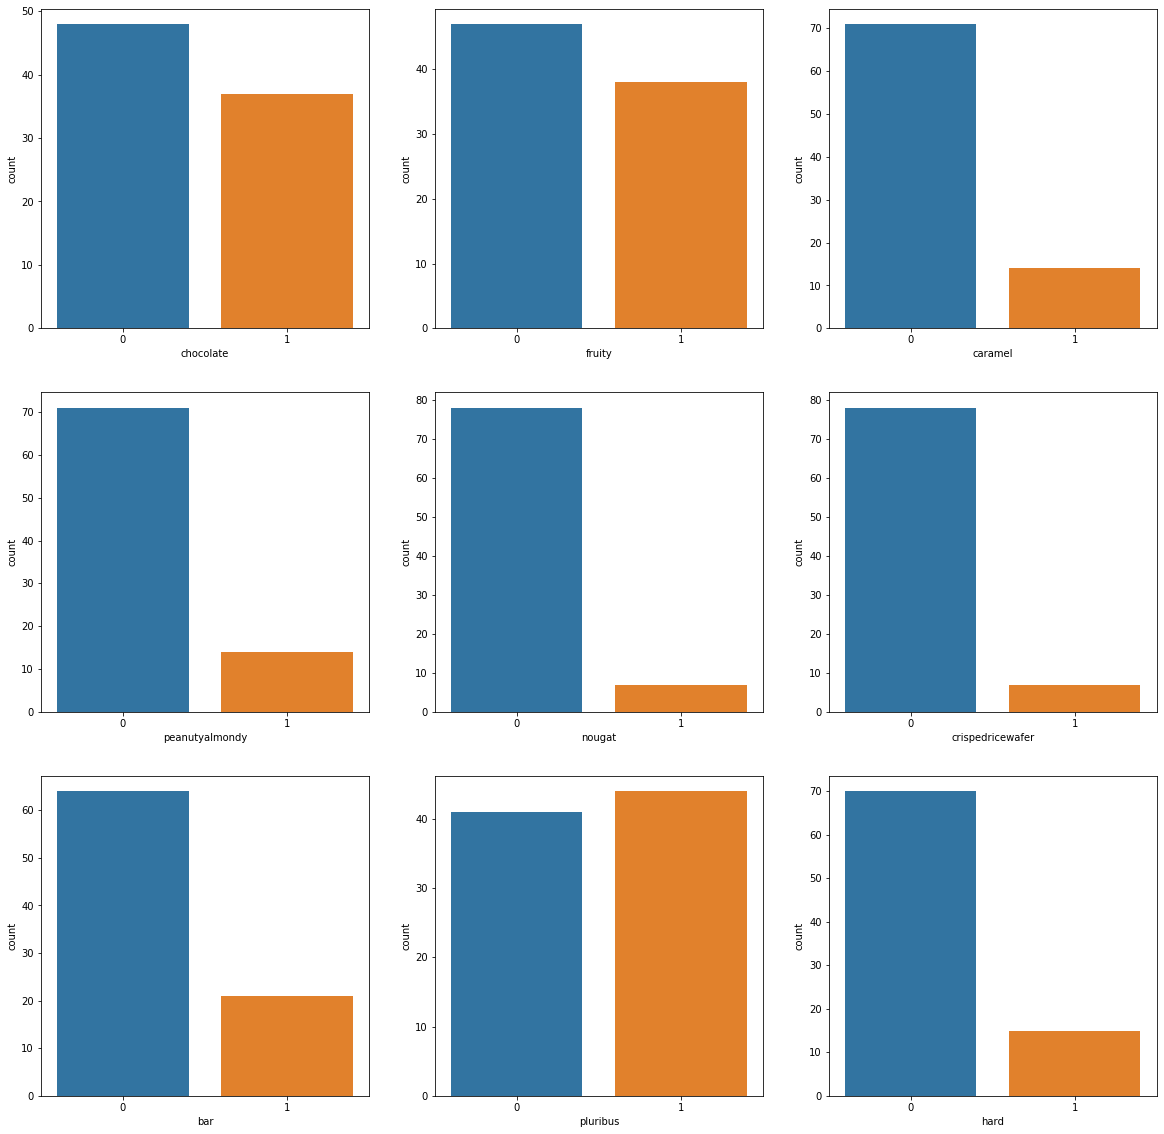

In [7]:
fig, ax = plt.subplots(3, 3,figsize=(20,20))
plt.subplot(3,3,1)
count('chocolate')
plt.subplot(3,3,2)
count('fruity')
plt.subplot(3,3,3)
count('caramel')
plt.subplot(3,3,4)
count('peanutyalmondy')
plt.subplot(3,3,5)
count('nougat')
plt.subplot(3,3,6)
count('crispedricewafer')
plt.subplot(3,3,7)
count('bar')
plt.subplot(3,3,8)
count('pluribus')
plt.subplot(3,3,9)
count('hard')

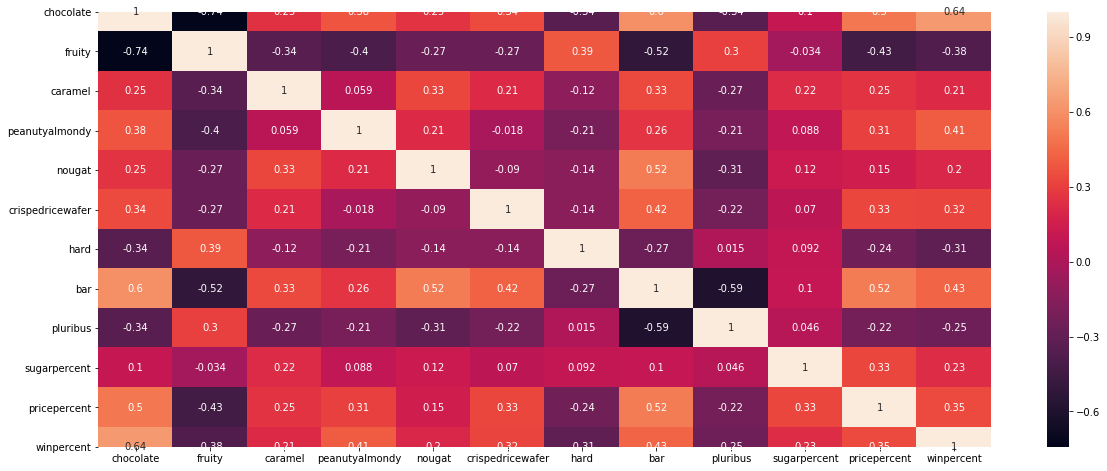

In [8]:
#Heatmap to see correlation
plt.figure(figsize = (20,8))        
sns.heatmap(df.corr(),annot=True)

In [9]:
#selecting data to model
x=df[['fruity','bar','pricepercent','winpercent']]
y=df['chocolate']

In [10]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=3)


In [11]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#fit the model
model.fit(X_train,y_train)

C:\Users\ELHODA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#predict the model
y_pred = model.predict(X_test)

In [13]:
#computing accuarcy
model.score(X_test,y_test)

0.8846153846153846

In [14]:
#calssification report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.82      0.90      0.86        10

    accuracy                           0.88        26
   macro avg       0.88      0.89      0.88        26
weighted avg       0.89      0.88      0.89        26

